In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
path=r"C:\Users\HP\Downloads\cats_dogs"   # Name of the main folder
cate=["cats","dogs"]            # Images are stored in this subfolder
# Here we are directly reading the raw images
# We are giving the path where images are stored

In [3]:
for i in cate:
    folders=os.path.join(path,i)
    print(folders)
# Here we are joining the two paths so that it will be easy for us to read the images.
# We have just entered into the folder but we are not reading images.

C:\Users\HP\Downloads\cats_dogs\cats
C:\Users\HP\Downloads\cats_dogs\dogs


In [4]:
for i in cate:
    folders=os.path.join(path,i)      # Giving the path of folders where images are saved
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        print(image_path)             # We are able to access the images


C:\Users\HP\Downloads\cats_dogs\cats\cat.101.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.102.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.103.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.104.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.105.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.106.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.107.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.108.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.109.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.11.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.110.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.111.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.112.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.113.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.114.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.115.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.116.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.117.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.118.jpg
C:\Users\HP\Downloads\cats_dogs\cats\cat.119.jpg
C:\Users\HP\Downloads

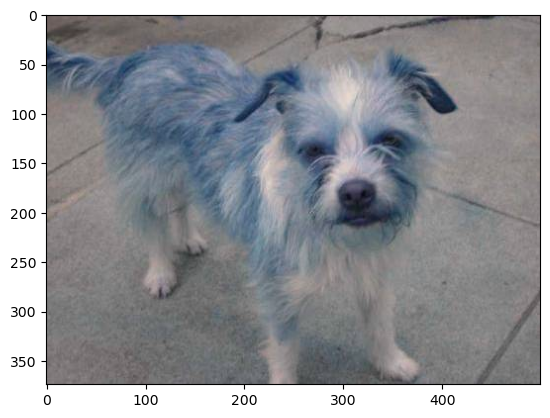

In [5]:
for i in cate:
    folders=os.path.join(path,i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        plt.imshow(image_array)
        break

In [6]:
image_size=200
input_image=[]

for i in cate:
    folders=os.path.join(path,i)
    label=cate.index(i)    # Here we need to tell the model which image is of cat and which image is of dog
    print("Value of label is ",label)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size)) # Resizing the image to 200*200
        input_image.append([image_array,label])  # Attaching the target variable

Value of label is  0
Value of label is  1


In [7]:
len(input_image)

2000

In [8]:
np.random.shuffle(input_image)

In [9]:
# Till this point x and y values are together now lets seperate them 
x=[]
y=[]
for x_values,labels in input_image:
    x.append(x_values)
    y.append(labels)

In [10]:
x=np.array(x)
y=np.array(y)

In [11]:
x.shape
# 3 Color image
# 2 Black and white images

(2000, 200, 200, 3)

In [12]:
y

array([1, 0, 1, ..., 0, 1, 1])

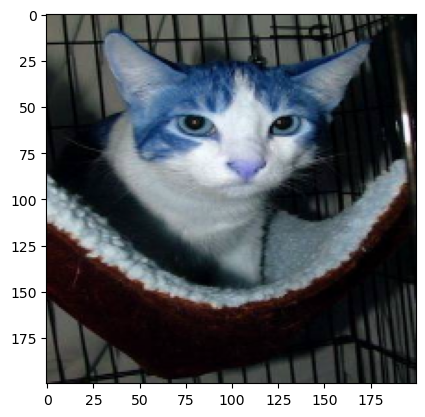

In [13]:
plt.imshow(x[1])

In [14]:
# Designing the Convolutional Neural Network

In [15]:
from keras.models import Sequential   # To initialize your Neural Network
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [16]:
model=Sequential()
model.add(Conv2D(filters=10,kernel_size=(5,5),activation="relu",padding="same",input_shape=(200,200,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2,activation="softmax"))

E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [24]:
model.fit(x,y,epochs=20,batch_size=400)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7340 - loss: 0.5697
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8341 - loss: 0.3698
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8247 - loss: 0.3582
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8727 - loss: 0.2985
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8661 - loss: 0.2918
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9145 - loss: 0.2524
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9074 - loss: 0.2526
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9179 - loss: 0.2349
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9316 - loss: 0.2227
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9353 - loss: 0.2161
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9386 - loss: 0.2048
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9427 - loss: 0.2009
Epoch 13/20
5

In [25]:
pred=model.predict(x)
pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step


array([[3.1604998e-07, 9.9999964e-01],
       [9.9999857e-01, 1.4746988e-06],
       [6.7954414e-02, 9.3204558e-01],
       ...,
       [5.8027041e-01, 4.1972959e-01],
       [2.8445960e-03, 9.9715543e-01],
       [3.5254908e-01, 6.4745092e-01]], dtype=float32)

In [26]:
pred_values=np.argmax(pred,axis=1)
pred_values

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,pred_values)

array([[984,  16],
       [ 43, 957]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y,pred_values)

0.9705

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Our Model says it is a Dog


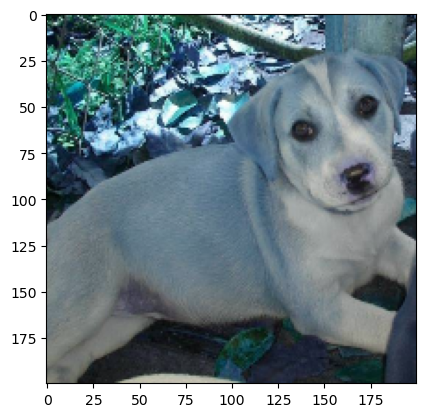

In [34]:
l=random.randint(0,len(y))
plt.imshow(x[l,:])
plt.show
y_pred=model.predict(x[l,:].reshape(1,200,200,3))
y_pred=y_pred>0.5  # Class1
if y_pred[0][0]==True and y_pred[0][1]==False:
    print("Our Model says it is a Cat")
else:
    print("Our Model says it is a Dog")